In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6,6)

In [2]:
unemployment=pd.read_excel(r"C:\Users\Windows 7\Documents\mypython\Pandas Course Resources\project_data\india.xlsx",
                          header=0,
                          names=["Region","Date","Estimated_Unemployment_Rate","Estimated_Employed","Estimated_Labour_Participation_Rate",
                                "Area"],
                          #skiprows=[0],
                          parse_dates=["Date"],
                          )

In [3]:
unemployment.set_index("Date",inplace=True)

In [4]:
#checking for null values
unemployment.isna().sum()

Region                                 0
Estimated_Unemployment_Rate            0
Estimated_Employed                     0
Estimated_Labour_Participation_Rate    0
Area                                   0
dtype: int64

In [5]:
unemployment.dtypes

Region                                  object
Estimated_Unemployment_Rate            float64
Estimated_Employed                       int64
Estimated_Labour_Participation_Rate    float64
Area                                    object
dtype: object

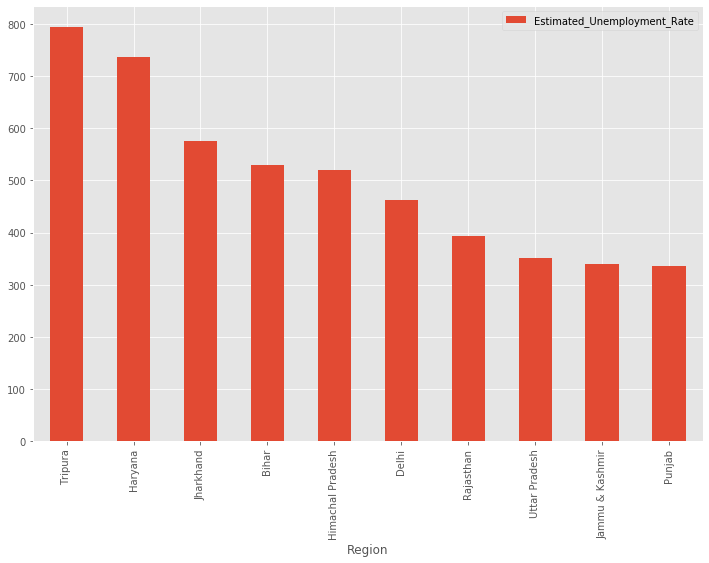

In [27]:
# top 10 states with highest unemployment rates
(unemployment.
 groupby(["Region"])[["Estimated_Unemployment_Rate"]].sum()
 .sort_values('Estimated_Unemployment_Rate',ascending=False)
).iloc[:10].plot.bar();

# Analysis on the basis of time

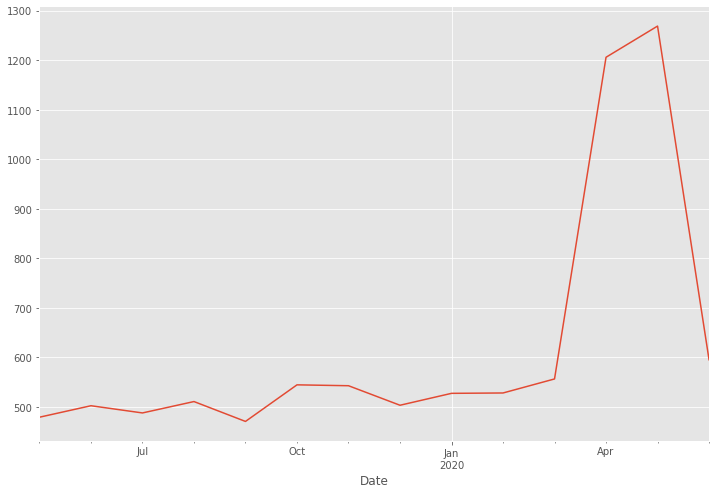

In [29]:
# Set a date index, graby the Estimated_Unemployment_Rate column, and calculating a monthly sum.
(unemployment.set_index("Date")
.loc[:,"Estimated_Unemployment_Rate"]
 .resample("M")
 .sum()
 .plot()
);

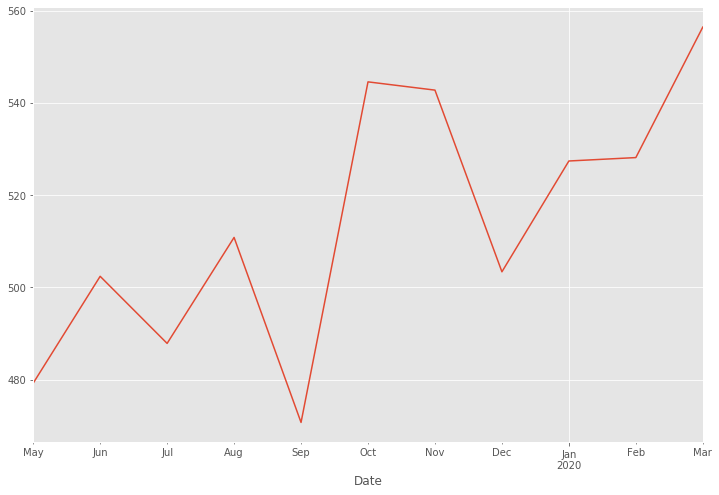

In [40]:
(unemployment.set_index("Date")
.loc["2019-03-01":"2020-04-01","Estimated_Unemployment_Rate"]
 .resample("M")
 .sum()
 .plot()
);

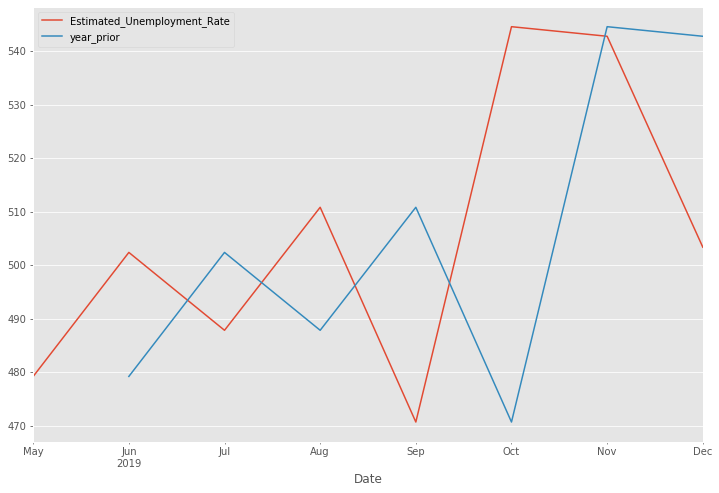

In [51]:
#comparing the differences on monthly basis
(unemployment.set_index("Date")
.loc[:, ["Estimated_Unemployment_Rate"]]
 .resample("M")
 .sum()
 .assign(year_prior =lambda x: x["Estimated_Unemployment_Rate"].shift(1))
 .loc["2019"]
 .plot()
);

In [6]:
unemployment

,Region,Estimated_Unemployment_Rate,Estimated_Employed,Estimated_Labour_Participation_Rate,Area
Date,,,,,
2019-05-31,Andhra Pradesh,3.65,11999139,43.24,Rural
2019-06-30,Andhra Pradesh,3.05,11755881,42.05,Rural
2019-07-31,Andhra Pradesh,3.75,12086707,43.50,Rural
2019-08-31,Andhra Pradesh,3.32,12285693,43.97,Rural
2019-09-30,Andhra Pradesh,5.17,12256762,44.68,Rural
...,...,...,...,...,...
2020-02-29,West Bengal,7.55,10871168,44.09,Urban
2020-03-31,West Bengal,6.67,10806105,43.34,Urban
2020-04-30,West Bengal,15.63,9299466,41.20,Urban


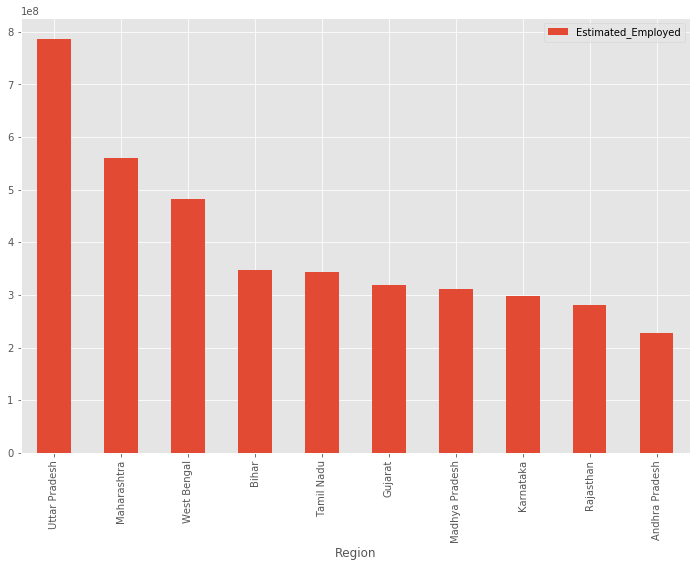

In [12]:
#top ten states on the basis of employment and labour participation rate
(unemployment.
 groupby(["Region"])[["Estimated_Employed"]].sum()
 .sort_values('Estimated_Employed',ascending=False)
).iloc[:10].plot.bar();

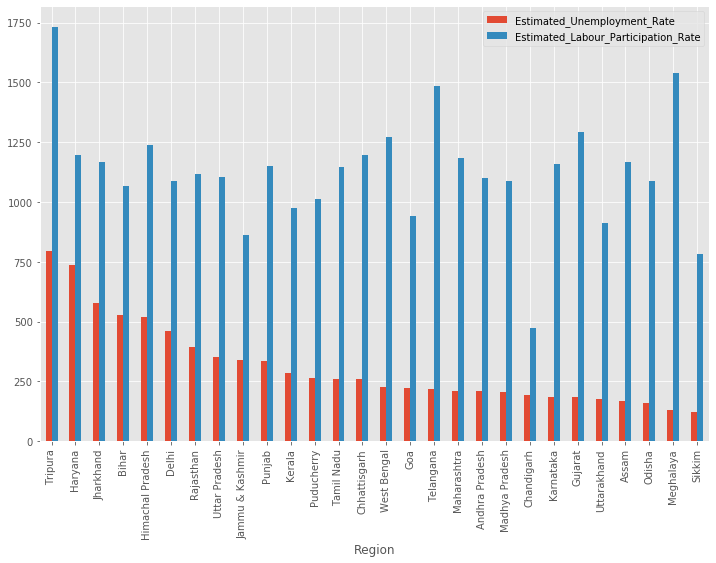

In [20]:
#comparison betwwen the difference in Estimated_Unemployment_Rate and Estimated_Labour_Participation_Rate
(unemployment.
 groupby(["Region"])[["Estimated_Unemployment_Rate","Estimated_Labour_Participation_Rate"]].sum()
 .sort_values('Estimated_Unemployment_Rate',ascending=False)
).plot.bar();

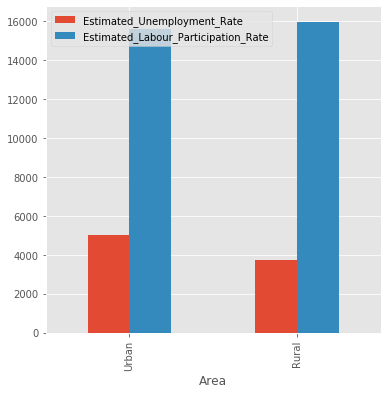

In [49]:
#comparing the effects of area on participation rates
(unemployment.
 groupby(["Area"])[["Estimated_Unemployment_Rate","Estimated_Labour_Participation_Rate"]].sum()
 .sort_values('Estimated_Unemployment_Rate',ascending=False)
).plot.bar();


In [42]:
#pivot of the top 5 unemployed states
states_top5_unemployment = (unemployment
                .loc[unemployment["Region"].isin(['Tripura','Hariyana', 'Jharkhand', 'Bihar', 'Himachal pradesh'])]
                .pivot_table(index="Date", columns="Region") 
                .droplevel(0, axis=1))

In [37]:
#pivot of the top 5 unemployed states broken by month
states_top5_unemployment_monthly = states_top5_unemployment.groupby(states_top5_unemployment.index.month).sum()

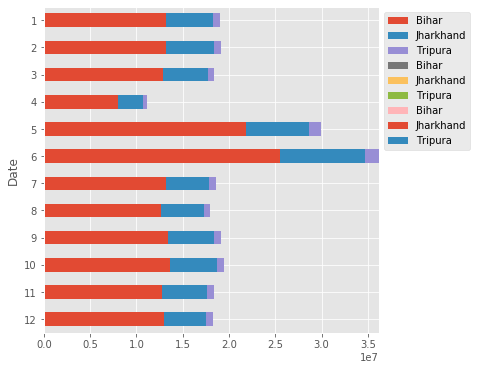

In [39]:
(states_top5_unemployment_monthly
 .sort_index(ascending=False)    
 .plot.barh(stacked=True)
 .legend(bbox_to_anchor=(1, 1))
);

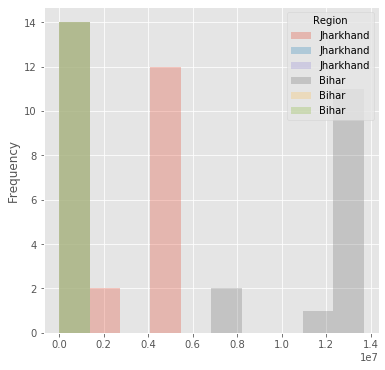

In [41]:
#just a histogram of two neighbours
states_top5_unemployment.loc[:, ['Jharkhand', 'Bihar']].plot.hist(alpha=.3);